In [231]:
%run Helper.ipynb

Num GPUs Available:  1


In [100]:
# Load all images
images = load_images('inputs/samples/')

KeyboardInterrupt: 

In [3]:
# Load all models
models = {}
for name, handle in ALL_MODELS.items():
    print('Loading model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    models[name] = load_model(handle)

Loading model EfficientDet
Legacy set to False


Model loaded!
Loading model Faster R-CNN
Legacy set to False
Model loaded!
Loading model Faster R-CNN (OpenImages)
Legacy set to True
Model loaded!
Loading model CenterNet
Legacy set to False
Model loaded!


In [4]:
# Setup detections (which can be used to generate statistics later)
images_with_detection = {}

# Run detection for all models
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Run inference
    images_with_detection[name] = run_inference(images, model)

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


In [5]:
# Setup detected classes with count
detected_classes = {}

for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save generated detections for statistics
    detected_classes[name] = get_detections_for_images(images_with_detection[name])

Running for model EfficientDet
Legacy set to False
Running for model Faster R-CNN
Legacy set to False
Running for model Faster R-CNN (OpenImages)
Legacy set to True
Running for model CenterNet
Legacy set to False


In [6]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Draw detections on image
    draw_detections_on_images(images_with_detection[name])

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


In [7]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save new images
    save_images(images_with_detection[name], name)

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


EfficientDet: 338.0
Faster R-CNN: 553.0
Faster R-CNN (OpenImages): 335.0
CenterNet: 190.0


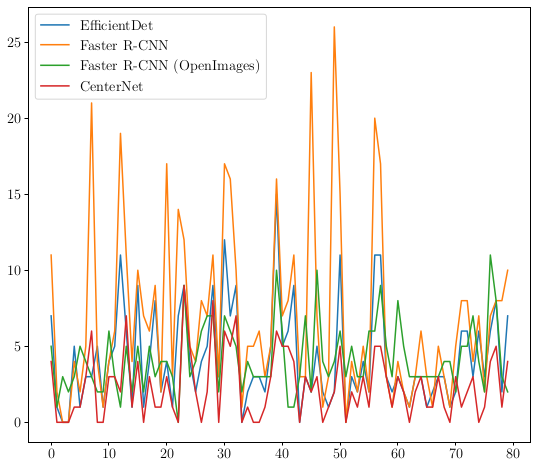

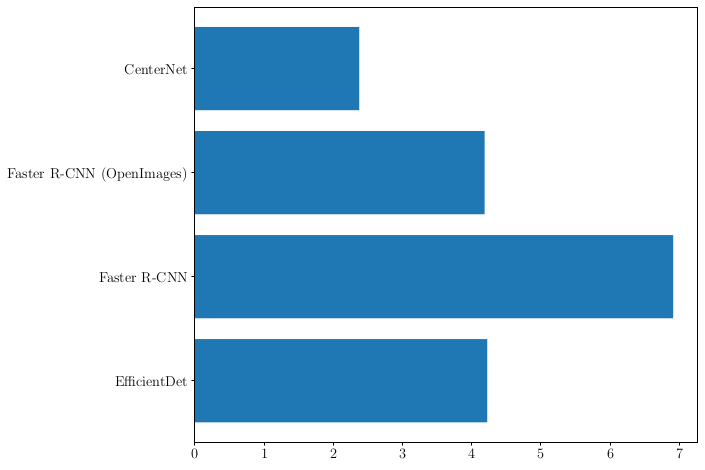

In [224]:
# Generate statistics
get_statistics_for_detections(detected_classes, len(images))
generate_detection_charts(detected_classes, len(images))

EfficientDet: 0.888217000691085
CenterNet: 0.7931125131440588
OpenImages (Faster R-CNN): 0.8473528387321491
Faster R-CNN: 0.7408280922431866


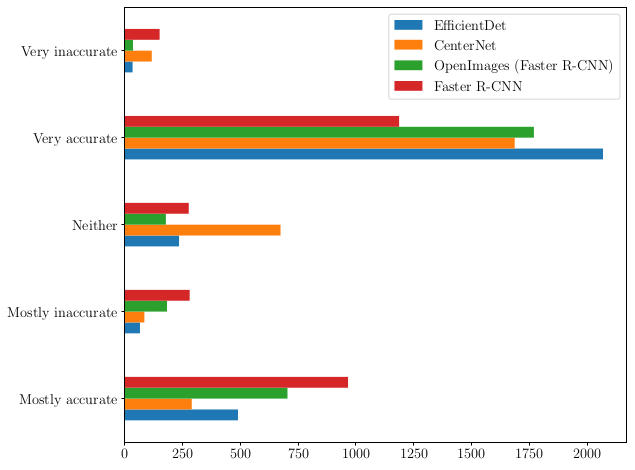

In [225]:
# Generate statistics from survey
detection_results = pd.read_csv("outputs/statistics/results_detection.csv")

mapping = {
    'Very accurate': 1,
    'Mostly accurate': 0.75,
    'Neither accurate nor inaccurate': 0.5,
    'Mostly inaccurate': 0.25,
    'Very inaccurate': 0
}

series = {}
for model_shortcut in ['EfficientDet', 'CenterNet', 'OpenImages (Faster R-CNN)', 'Faster R-CNN']:
    model_columns = detection_results.filter(like=model_shortcut[0]).columns
    
    mappings = pd.Series(dtype='float64')
    for column in model_columns:
        mappings = pd.concat([mappings, detection_results[column].dropna().map(lambda x: mapping[x])])
    
    series[model_shortcut] = detection_results[model_columns.array].applymap(lambda x: 'Neither' if type(x) == str and 'Neither' in x else x).apply(pd.value_counts).sum(axis=1)

    print(model_shortcut + ': ' + str(mappings.mean()))
    
plot = pd.DataFrame(series).plot(kind='barh')
plot.legend(prop={'size': 14})

save_fig('outputs/statistics/model_comparison')

In [104]:
# Generate stats about IAA (Inter-Annotator-Agreement)
calculate_iaa(detection_results)

0.4990372138744946

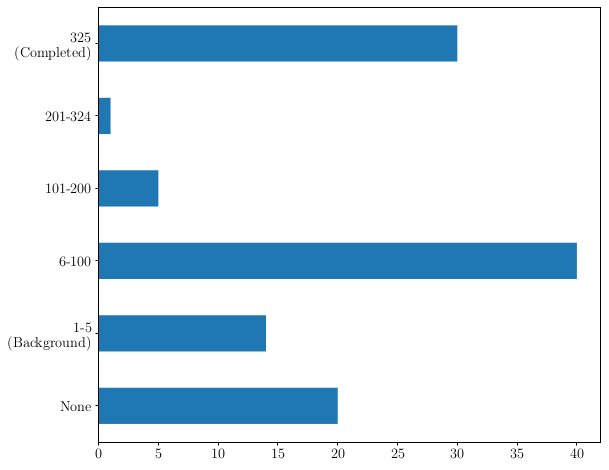

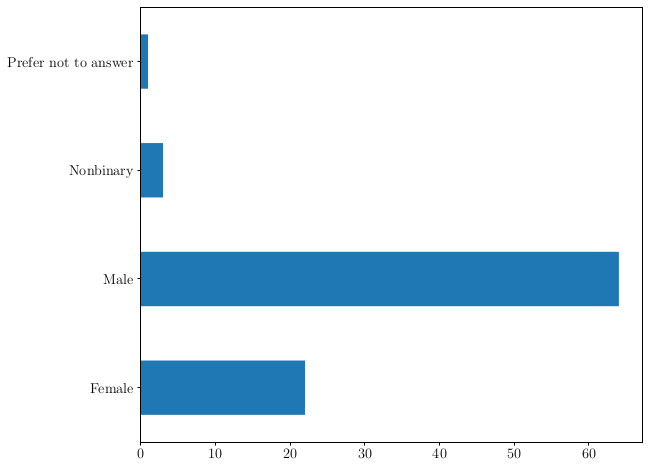

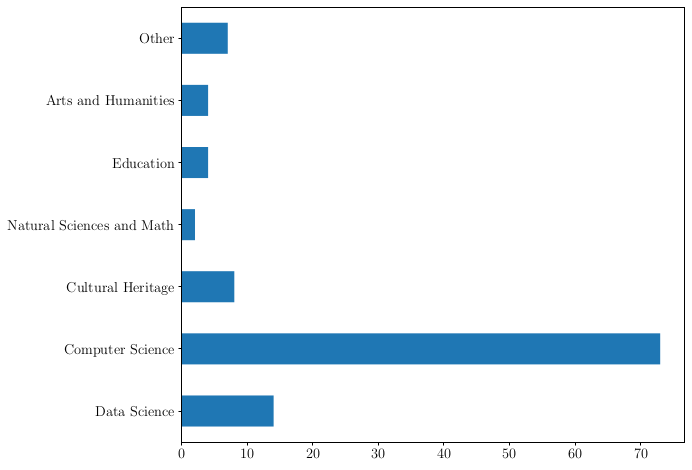

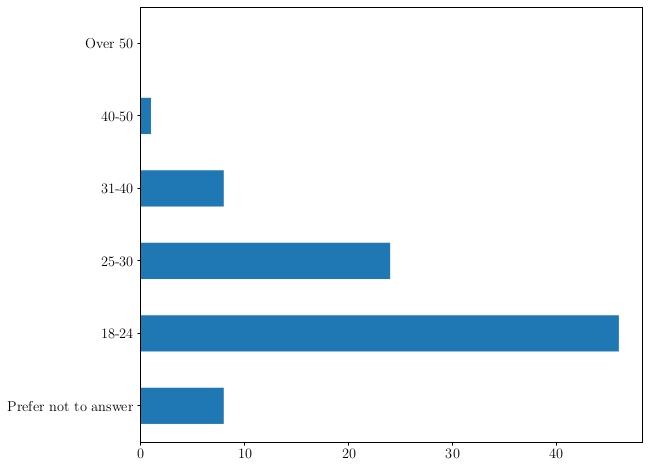

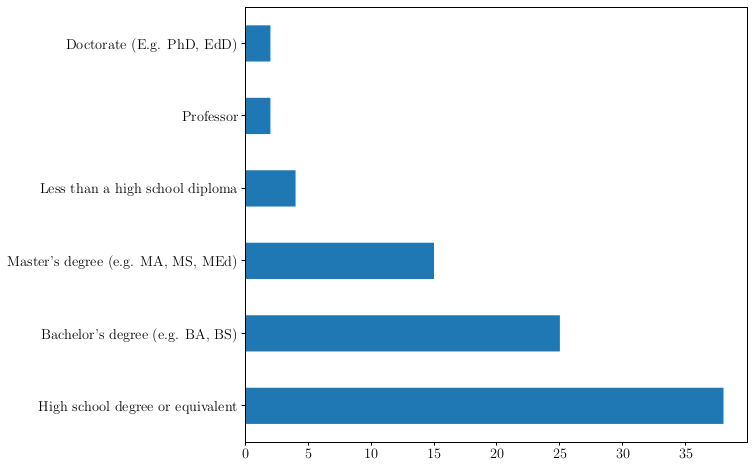

In [232]:
# Statistics on participant backgrounds
background_results = pd.read_csv("outputs/statistics/results_background.csv")

# Plot statistics
if not background_results.empty:
    generate_participant_statistics(background_results)